In [1]:
%matplotlib inline
from graph import *
from kernel import *
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt
db = Database()

In [2]:
#db_lab, db_nolab = db.gen_database_test(10, 10, 3, 4)
ker=Kernel(0.05)
#db.loaded = True
#db.export_db(db_nolab,"no_sing.dat")
db_nolab = db.import_db("no_sing.dat")


In [3]:
%%time
s = SVM(db_lab, 0.7, 0.9, kernel="inv_kernel")
s.learn()
s2 = SVM(db_nolab, 0.7, 0.9, kernel="inv_kernel")
s2.learn()
print("Lab score",s.cross_val_score(3)," & nolab score",s2.cross_val_score(3))

NameError: name 'db_lab' is not defined

In [4]:
raw = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.raw_kernel)
inv = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.inv_kernel)
syl = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.sylv_eq_kernel)
syl = np.ones(syl.shape)-syl
con = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.conj_grad_kernel)
fix = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.fixed_point_kernel)
spe = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.spec_decomp_kernel)

In [12]:
diff1 = ker.scale_and_compare(raw,inv)
diff2 = ker.scale_and_compare(raw,syl)
diff3 = ker.scale_and_compare(raw,con)
diff4 = ker.scale_and_compare(raw,fix)
diff5 = ker.scale_and_compare(raw,spe)

diff6 = ker.scale_and_compare(inv,syl)
diff7 = ker.scale_and_compare(inv,con)
diff8 = ker.scale_and_compare(inv,fix)
diff9 = ker.scale_and_compare(inv,spe)

diff10 = ker.scale_and_compare(syl,con)
diff11 = ker.scale_and_compare(syl,fix)
diff12 = ker.scale_and_compare(syl,spe)

diff13 = ker.scale_and_compare(con,fix)
diff14 = ker.scale_and_compare(con,spe)

diff15 = ker.scale_and_compare(fix,spe)
print(diff1,diff2,diff3,diff4,diff5)
print(diff6,diff7,diff8,diff9)
print(diff10,diff11,diff12)
print(diff13,diff14)
print(diff15)

0.00011041859479691838 9.842266139178993e-05 8.945440223225803e-05 0.00010783505068728948 0.00010618517472346058
2.147002476338518e-05 7.947868752307336e-05 4.051259100553825e-06 6.854989986726549e-06
8.082800506265158e-05 1.7445887227519466e-05 1.4616800048609014e-05
7.922669753185048e-05 7.921807612168198e-05
2.847352441590401e-06


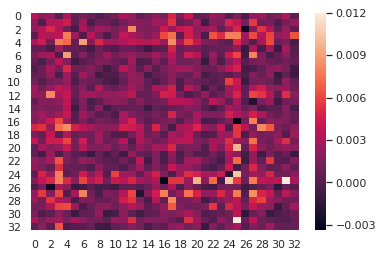

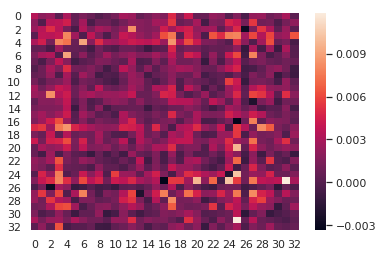

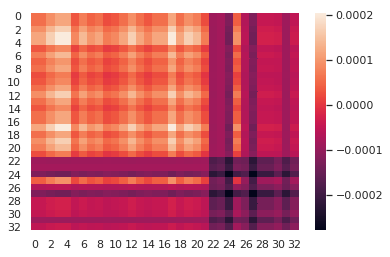

In [11]:
plt.clf()
sns.heatmap(spe-con)
plt.figure()
sns.heatmap(fix-con)
plt.figure()
sns.heatmap(fix-spe)

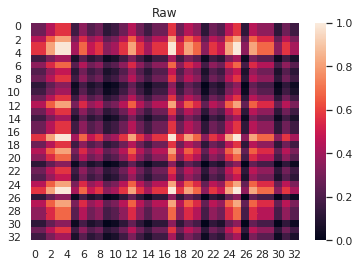

In [6]:
plt.clf()
plt.title("Raw Kernel")
sns.heatmap(raw)

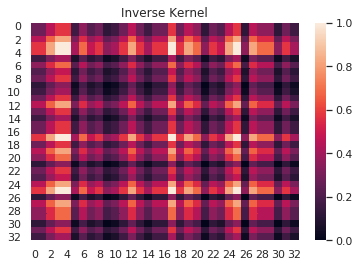

In [21]:
plt.clf()
plt.title("Inverse Kernel")
sns.heatmap(inv)

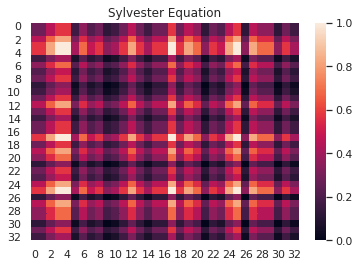

In [8]:
plt.clf()
plt.title("Sylvester Equation")
sns.heatmap(syl)

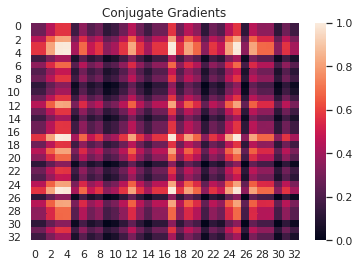

In [9]:
plt.clf()
plt.title("Conjugate Gradients")
sns.heatmap(con)

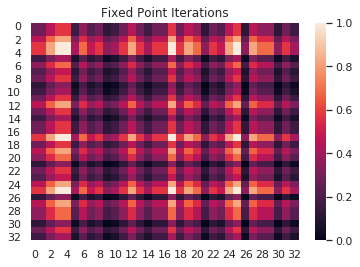

In [10]:
plt.clf()
plt.title("Fixed Point Iterations")
sns.heatmap(fix)

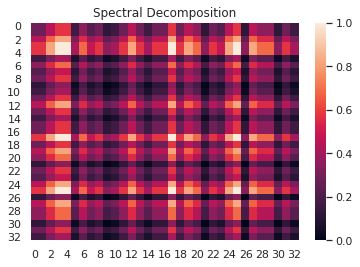

In [11]:
plt.clf()
plt.title("Spectral Decomposition")
sns.heatmap(spe)

In [ ]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

In [ ]:
dbA.shape

## All graphs
Star

In [ ]:
G = db.gen_graph("star",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"star",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Ring

In [ ]:
G = db.gen_graph("ring",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"ring",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Tree

In [ ]:
G = db.gen_graph("tree",9,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"tree",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

# Points fixes : faire varier lambda et montrer différence temps de convergence & verifier si lambda plus haut donne de meilleur accuracy

[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
[0.5798449337482452, 0.6490519344806671, 0.662384170293808, 0.5998552024364472, 0.6043290436267853, 0.6170977890491486, 0.684108567237854, 0.603993034362793, 0.5894962430000306, 0.6159265697002411, 0.6428227961063385, 0.6275781273841858, 0.6202629566192627, 0.6687551021575928, 0.6322878539562226, 0.6354853630065918, 0.6539177596569061, 0.6794687271118164, 0.6646880209445953, 0.6354062497615814, 0.5963577449321746, 0.6048725545406342, 0.630007290840149, 0.7824590086936951, 0.7089894056320191, 0.7756741642951965, 0.7197912037372589, 0.7564894556999207, 0.7652088224887847, 0.7195470452308654, 0.7060678422451019, 0.7829135119915008, 0.6699366986751556, 0.7000483334064483, 0.6912829995155334, 0.7109702944755554]


/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:827: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/leo/Documents/Projets/PLDAC/graph-kernels/kernel.py:99: RuntimeWarning: invalid value encountered in matmul
  func = lambda x: np.asarray(px+(self.lbd*Wx)@x)
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:845: RuntimeWarning: invalid value encountered in less
  if np.all(np.abs(relerr) < xtol):


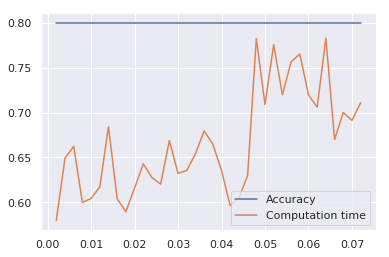

In [9]:
xs = []
scores = []
times = []
N = 500
for x in range(1,N):
    try :
        #moyenne
        t = 0
        for _ in range(40):
            s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
            t+=s.learn()
        t /= 40
        scores.append(s.score())
        xs.append(x/N)
        times.append(t)
    except:
        break
print(scores)
print(times)
plt.figure()
plt.plot(xs,scores,label="Accuracy")
plt.plot(xs,times,label="Computation time")
plt.legend()

# Computation time for different kernels VARIATION ON LAMBDA

In [22]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
N = 10
for x in range(1,N):
    xs.append(x/N)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="raw_kernel")
    t=s.learn()
    t_raw.append(t)
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="inv_kernel")
    t=s.learn()
    t_inv.append(t)
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="sylv_eq_kernel")
    t=s.learn()
    t_syl.append(t)
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="conj_grad_kernel")
    t=s.learn()
    t_conj.append(t)
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="spec_decomp_kernel")
    t=s.learn()
    t_spec.append(t)
    try : 
        s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
        t=s.learn()
        t_fix.append(t)
    except:
        pass

/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:827: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/leo/Documents/Projets/PLDAC/graph-kernels/kernel.py:99: RuntimeWarning: invalid value encountered in matmul
  func = lambda x: np.asarray(px+(self.lbd*Wx)@x)
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:845: RuntimeWarning: invalid value encountered in less
  if np.all(np.abs(relerr) < xtol):
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:827: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/leo/Documents/Projets/PLDAC/graph-kernels/kernel.py:99: RuntimeWarning: invalid value encountered in matmul
  func = lambda x: np.asarray(px+(self.lbd*Wx)@x)
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:845: RuntimeWarning: invalid value encountered in less
  if np.all(np.abs(relerr) < xtol):
/home/leo/.local/lib/python3

Cannot converge


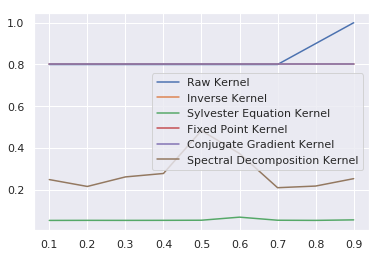

In [27]:
plt.figure()
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs[0:len(t_fix)],t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.legend()

# Accuracy for different kernels VARIATION ON LAMBDA

In [25]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
N = 10
for x in range(1,N):
    xs.append(x/N)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="raw_kernel")
    t=s.learn()
    t_raw.append(s.score())
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="inv_kernel")
    t=s.learn()
    t_inv.append(s.score())
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="sylv_eq_kernel")
    t=s.learn()
    t_syl.append(t)
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="conj_grad_kernel")
    t=s.learn()
    t_conj.append(s.score())
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="spec_decomp_kernel")
    t=s.learn()
    t_spec.append(t)
    try : 
        s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
        t=s.learn()
        t_fix.append(s.score())
    except:
        pass

/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:827: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/leo/Documents/Projets/PLDAC/graph-kernels/kernel.py:99: RuntimeWarning: invalid value encountered in matmul
  func = lambda x: np.asarray(px+(self.lbd*Wx)@x)
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:845: RuntimeWarning: invalid value encountered in less
  if np.all(np.abs(relerr) < xtol):
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:827: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/leo/Documents/Projets/PLDAC/graph-kernels/kernel.py:99: RuntimeWarning: invalid value encountered in matmul
  func = lambda x: np.asarray(px+(self.lbd*Wx)@x)
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:845: RuntimeWarning: invalid value encountered in less
  if np.all(np.abs(relerr) < xtol):
/home/leo/.local/lib/python3

Cannot converge


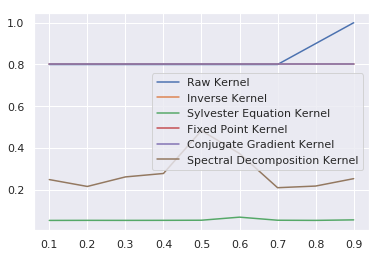

In [26]:
plt.figure()
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs[0:len(t_fix)],t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.legend()

# Computation time for different kernels VARIATION ON NB OF GRAPHS

In [2]:
db_lab, db_nolab = db.gen_database_test(10, 10, 3, 4)
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
N = 10
for x in range(1,N):
    _, db_nolab = db.gen_database_test(5*x, 10, 3, 4)
    xs.append(x*10)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="raw_kernel")
    t=s.learn()
    t_raw.append(s.score())
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="inv_kernel")
    t=s.learn()
    t_inv.append(s.score())
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="sylv_eq_kernel")
    t=s.learn()
    t_syl.append(t)
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel")
    t=s.learn()
    t_conj.append(s.score())
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="spec_decomp_kernel")
    t=s.learn()
    t_spec.append(t)
    try : 
        s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel")
        t=s.learn()
        t_fix.append(s.score())
    except:
        pass

/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:827: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/leo/Documents/Projets/PLDAC/graph-kernels/kernel.py:99: RuntimeWarning: invalid value encountered in matmul
  func = lambda x: np.asarray(px+(self.lbd*Wx)@x)
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:845: RuntimeWarning: invalid value encountered in less
  if np.all(np.abs(relerr) < xtol):
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:827: RuntimeWarning: overflow encountered in square
  return p0 - np.square(p1 - p0) / d
/home/leo/Documents/Projets/PLDAC/graph-kernels/kernel.py:99: RuntimeWarning: invalid value encountered in matmul
  func = lambda x: np.asarray(px+(self.lbd*Wx)@x)
/home/leo/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:845: RuntimeWarning: invalid value encountered in less
  if np.all(np.abs(relerr) < xtol):


ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
plt.figure()
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs[0:len(t_fix)],t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.legend()

# same on nodes

# verifier si approx ameliore ou empire accuracy et regarder temps calcul